# 다양한 플롯에서의 'explode'와 유사한 강조(Emphasis) 기능 🎯

## 학습 목표
- 파이차트의 explode 효과와 유사한 다양한 강조 기법 이해
- 바차트, 라인플롯, 산점도 등에서의 강조 방법 실습
- 데이터 시각화에서 시선을 집중시키는 다양한 테크닉 마스터

파이 차트의 **explode** 효과는 한 조각을 분리해 시선을 집중시키는 대표적 강조 방식입니다.  
하지만 파이 차트 외에도 다양한 플롯에서 각 데이터를 여러 방식으로 강조할 수 있습니다! 🚀

In [ ]:
# 필요한 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Rectangle
import warnings


warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 스타일 설정
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 시각화 라이브러리 설정 완료!")
print("🎨 다양한 강조 기법을 함께 배워봅시다!")

📊 시각화 라이브러리 설정 완료!
🎨 다양한 강조 기법을 함께 배워봅시다!


## 1. 파이차트 Explode 효과 복습 🥧

먼저 파이차트의 explode 효과를 다시 살펴보겠습니다.

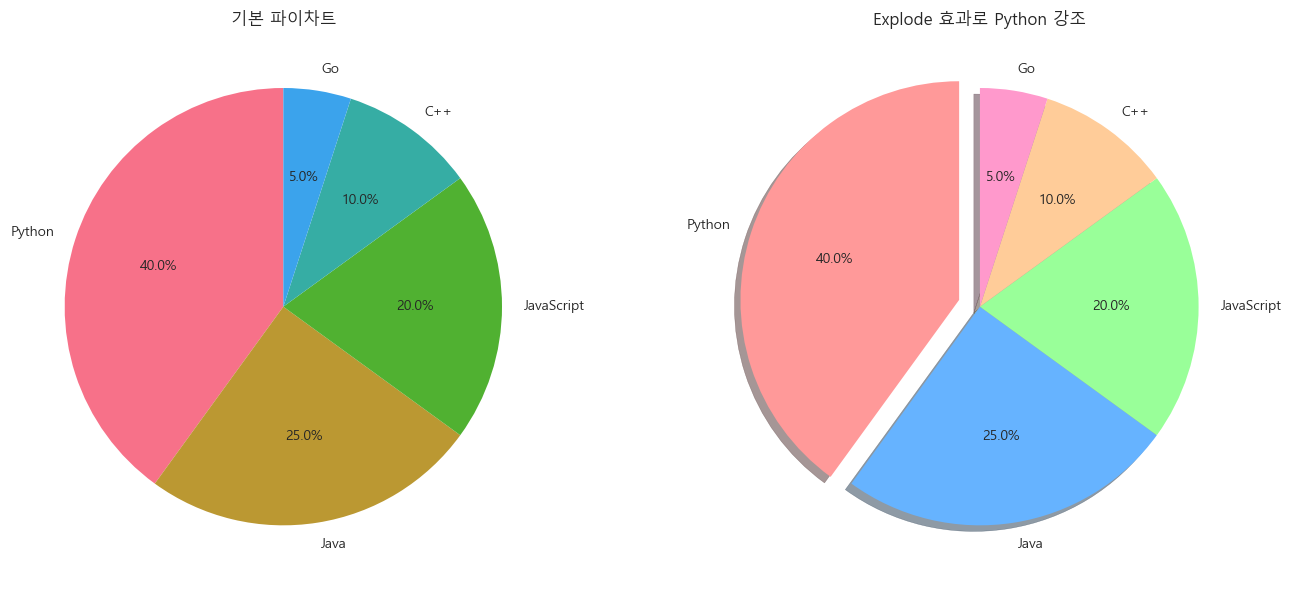

🍰 Explode 효과: 특정 조각을 분리하여 시선 집중!


In [28]:
plt.rc('font', family='Malgun Gothic') # 윈도우 한글 폰트


# 1. 파이차트 Explode 효과 예제
categories = ['Python', 'Java', 'JavaScript', 'C++', 'Go']
values = [40, 25, 20, 10, 5]

# 기본 파이차트 vs Explode 파이차트 비교
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 기본 파이차트
ax1.pie(values, labels=categories, autopct='%1.1f%%', startangle=90)
ax1.set_title('기본 파이차트')

# Explode 파이차트 (Python을 강조)
explode = (0.1, 0, 0, 0, 0)  # Python만 분리
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
ax2.pie(values, labels=categories, autopct='%1.1f%%', startangle=90, 
        explode=explode, colors=colors, shadow=True)
ax2.set_title('Explode 효과로 Python 강조')

plt.tight_layout()
plt.show()

print("🍰 Explode 효과: 특정 조각을 분리하여 시선 집중!")

## 2. 바차트(Bar Chart)에서의 강조 기법 📊

### 2.1 색상(Color) 강조
특정 바에만 눈에 띄는 색상을 적용하는 방법입니다.

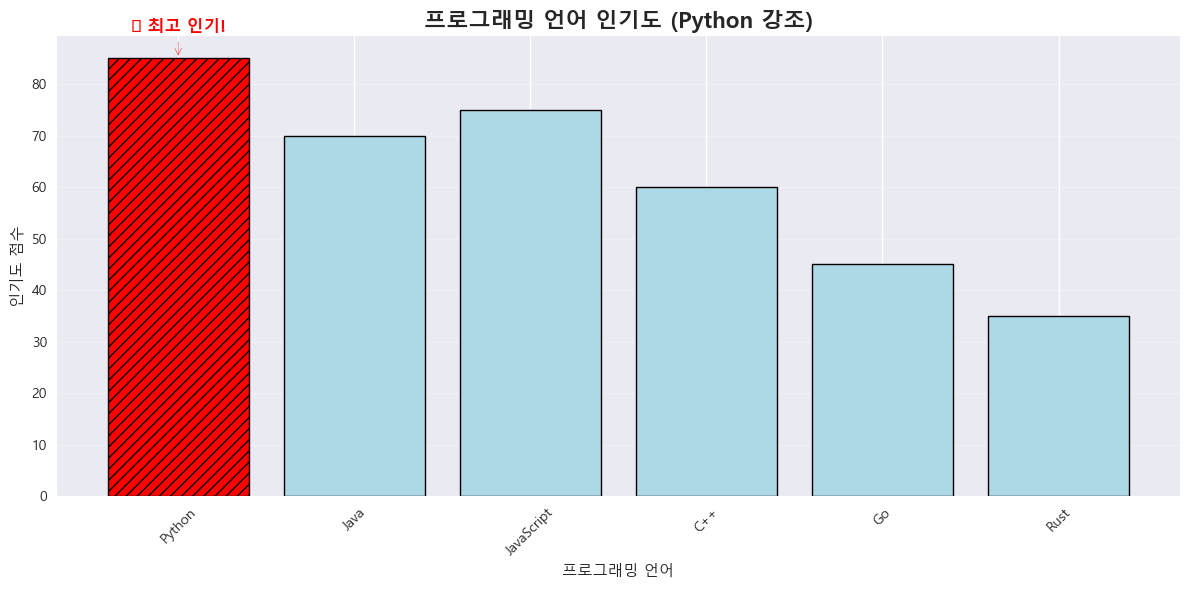

🎨 색상 강조: 특정 데이터를 다른 색으로 부각!


In [29]:
plt.rc('font', family='Malgun Gothic') # 윈도우 한글 폰트


# 2.1 바차트 - 색상 강조
programming_langs = ['Python', 'Java', 'JavaScript', 'C++', 'Go', 'Rust']
popularity = [85, 70, 75, 60, 45, 35]

# 색상 리스트 (Python만 빨간색으로 강조)
colors = ['red' if lang == 'Python' else 'lightblue' for lang in programming_langs]

plt.figure(figsize=(12, 6))
bars = plt.bar(programming_langs, popularity, color=colors, edgecolor='black', linewidth=1)

# Python 바에 특별한 패턴 추가
bars[0].set_hatch('///')  # 해치 패턴 추가

plt.title('프로그래밍 언어 인기도 (Python 강조)', fontsize=16, fontweight='bold')
plt.xlabel('프로그래밍 언어')
plt.ylabel('인기도 점수')
plt.xticks(rotation=45)

# 강조된 바 위에 주석 추가
plt.annotate('🏆 최고 인기!', xy=(0, popularity[0]), xytext=(0, popularity[0] + 5),
            ha='center', fontsize=12, fontweight='bold', color='red',
            arrowprops=dict(arrowstyle='->', color='red'))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("🎨 색상 강조: 특정 데이터를 다른 색으로 부각!")

### 2.2 투명도(Alpha) 및 크기 조절

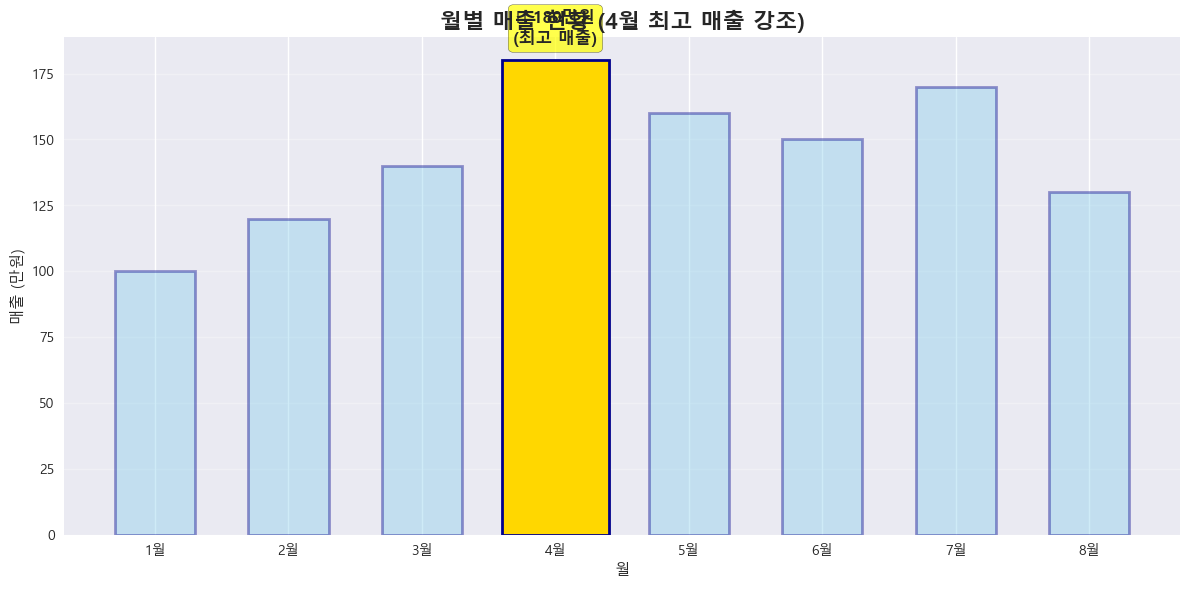

⚡ 투명도 & 크기: 중요한 데이터는 선명하고 크게!


In [30]:
plt.rc('font', family='Malgun Gothic') # 윈도우 한글 폰트


# 2.2 바차트 - 투명도와 크기 강조
sales_data = {
    '1월': 100, '2월': 120, '3월': 140, '4월': 180,  # 4월이 최고
    '5월': 160, '6월': 150, '7월': 170, '8월': 130
}

months = list(sales_data.keys())
sales = list(sales_data.values())

# 4월(최고 매출)을 강조
alphas = [0.4 if month != '4월' else 1.0 for month in months]
widths = [0.6 if month != '4월' else 0.8 for month in months]

plt.figure(figsize=(12, 6))

bars = []
for i, (month, sale) in enumerate(sales_data.items()):
    bar = plt.bar(i, sale, width=widths[i], alpha=alphas[i], 
                  color='gold' if month == '4월' else 'skyblue',
                  edgecolor='darkblue', linewidth=2)
    bars.extend(bar)

plt.title('월별 매출 현황 (4월 최고 매출 강조)', fontsize=16, fontweight='bold')
plt.xlabel('월')
plt.ylabel('매출 (만원)')
plt.xticks(range(len(months)), months)

# 최고 매출에 표시
max_idx = sales.index(max(sales))
plt.text(max_idx, max(sales) + 5, f'💰 {max(sales)}만원\n(최고 매출)', 
         ha='center', va='bottom', fontsize=12, fontweight='bold', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("⚡ 투명도 & 크기: 중요한 데이터는 선명하고 크게!")

## 3. 라인플롯(Line Plot)에서의 강조 기법 📈

### 3.1 선 굵기/색상 변경 및 배경 영역 강조

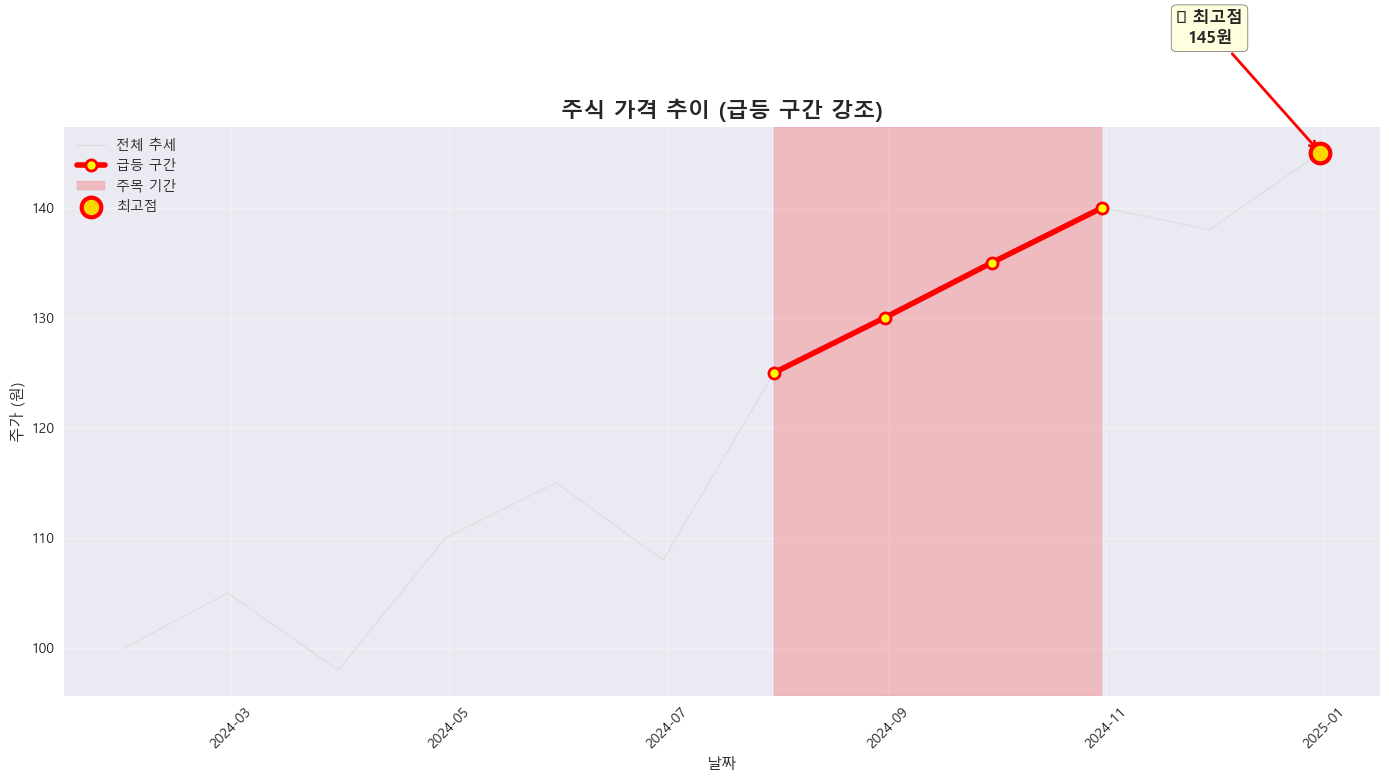

📊 라인 강조: 굵기, 색상, 배경으로 중요 구간 부각!


In [31]:
plt.rc('font', family='Malgun Gothic') # 윈도우 한글 폰트

# 3.1 라인플롯 - 선 굵기, 색상, 배경 강조
dates = pd.date_range('2024-01-01', periods=12, freq='M')
stock_prices = [100, 105, 98, 110, 115, 108, 125, 130, 135, 140, 138, 145]

plt.figure(figsize=(14, 8))

# 기본 라인 플롯
plt.plot(dates, stock_prices, color='lightgray', linewidth=1, alpha=0.5, label='전체 추세')

# 강조 구간 (7월-10월: 급등 구간)
emphasis_start, emphasis_end = 6, 9  # 인덱스
emphasis_dates = dates[emphasis_start:emphasis_end+1]
emphasis_prices = stock_prices[emphasis_start:emphasis_end+1]

# 강조 구간을 굵고 빨간 선으로 표시
plt.plot(emphasis_dates, emphasis_prices, color='red', linewidth=4, 
         label='급등 구간', marker='o', markersize=8, markerfacecolor='yellow', 
         markeredgecolor='red', markeredgewidth=2)

# 배경 영역 강조
plt.axvspan(dates[emphasis_start], dates[emphasis_end], alpha=0.2, color='red', 
            label='주목 기간')

# 특정 시점 강조 (최고점)
max_idx = stock_prices.index(max(stock_prices))
plt.scatter(dates[max_idx], stock_prices[max_idx], s=200, color='gold', 
           edgecolors='red', linewidths=3, zorder=5, label='최고점')

# 주석 추가
plt.annotate(f'📈 최고점\n{max(stock_prices)}원', 
            xy=(dates[max_idx], stock_prices[max_idx]), 
            xytext=(dates[max_idx-1], stock_prices[max_idx] + 10),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, fontweight='bold', ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))

plt.title('주식 가격 추이 (급등 구간 강조)', fontsize=16, fontweight='bold')
plt.xlabel('날짜')
plt.ylabel('주가 (원)')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("📊 라인 강조: 굵기, 색상, 배경으로 중요 구간 부각!")

### 3.2 다중 라인에서 특정 라인 강조

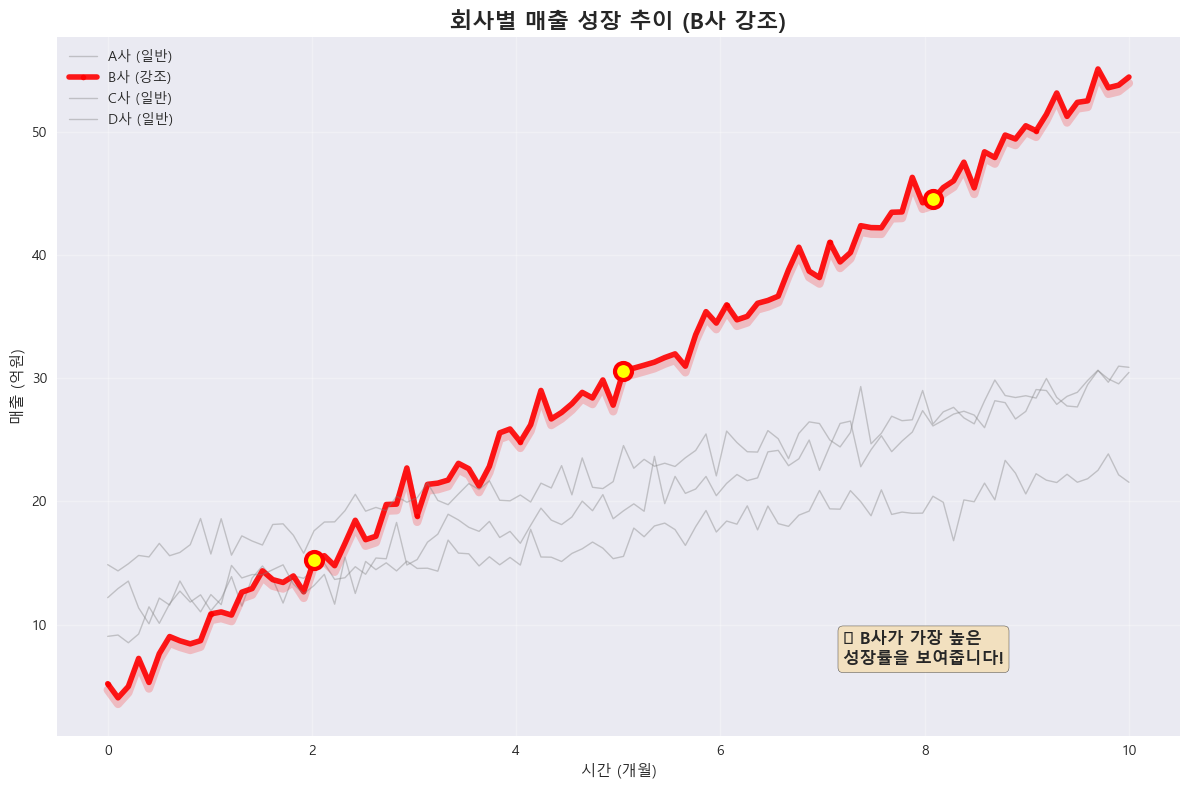

🔥 다중 라인 강조: 중요한 라인만 굵고 선명하게!


In [32]:
plt.rc('font', family='Malgun Gothic') # 윈도우 한글 폰트


# 3.2 다중 라인플롯 - 특정 라인 강조
x = np.linspace(0, 10, 100)
companies = ['A사', 'B사', 'C사', 'D사']

# 각 회사의 매출 함수 (B사가 가장 성장률이 높음)
y_data = {
    'A사': 10 + 2*x + np.random.normal(0, 1, 100),
    'B사': 5 + 5*x + np.random.normal(0, 1, 100),  # 가장 가파른 성장
    'C사': 15 + 1.5*x + np.random.normal(0, 1, 100),
    'D사': 12 + 1*x + np.random.normal(0, 1, 100)
}

plt.figure(figsize=(12, 8))

# 모든 라인을 연한 색으로 그리기
for company, y in y_data.items():
    if company != 'B사':
        plt.plot(x, y, color='gray', alpha=0.4, linewidth=1, label=f'{company} (일반)')
    else:
        # B사만 강조
        plt.plot(x, y, color='red', linewidth=4, label=f'{company} (강조)', 
                marker='o', markersize=4, markevery=10, alpha=0.9)
        
        # B사 라인에 그림자 효과
        plt.plot(x, y-0.5, color='red', alpha=0.2, linewidth=6)

# 특정 지점들 강조
highlight_points = [20, 50, 80]
for point in highlight_points:
    plt.scatter(x[point], y_data['B사'][point], s=150, color='yellow', 
               edgecolors='red', linewidths=3, zorder=5)

plt.title('회사별 매출 성장 추이 (B사 강조)', fontsize=16, fontweight='bold')
plt.xlabel('시간 (개월)')
plt.ylabel('매출 (억원)')
plt.legend()
plt.grid(True, alpha=0.3)

# 텍스트 박스로 설명 추가
textstr = '🚀 B사가 가장 높은\n성장률을 보여줍니다!'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.7, 0.15, textstr, transform=plt.gca().transAxes, fontsize=12,
        verticalalignment='top', bbox=props, fontweight='bold')

plt.tight_layout()
plt.show()

print("🔥 다중 라인 강조: 중요한 라인만 굵고 선명하게!")

## 4. 산점도(Scatter Plot)에서의 강조 기법 ⭐

### 4.1 점 색상, 크기, 모양 차별화

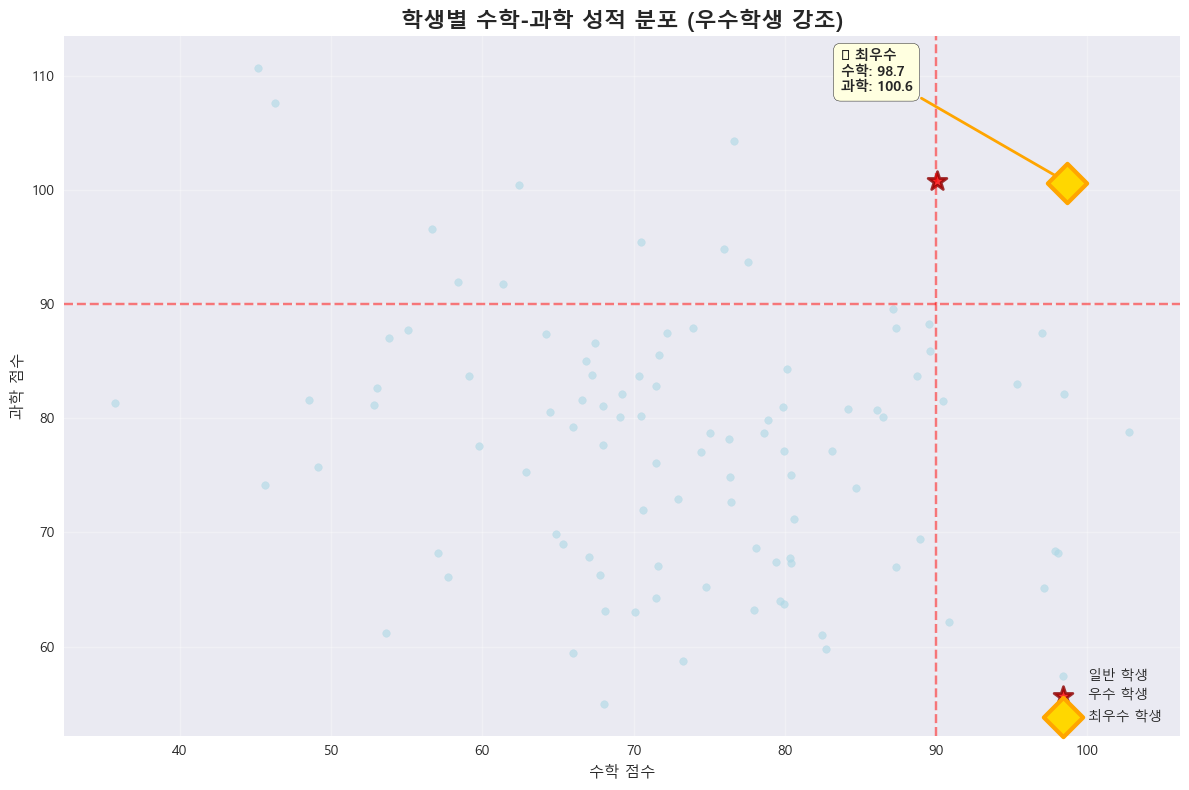

⭐ 산점도 강조: 크기, 색상, 모양으로 특별한 데이터 포인트 부각!


In [40]:
plt.rc('font', family='Malgun Gothic') # 윈도우 한글 폰트


# 4.1 산점도 - 점 속성으로 강조
np.random.seed(42)
n_points = 100

# 가상의 학생 성적 데이터
math_scores = np.random.normal(75, 15, n_points)
science_scores = np.random.normal(78, 12, n_points)

# 일부 우수학생 식별 (수학, 과학 모두 90점 이상)
excellent_students = (math_scores >= 90) & (science_scores >= 90)

plt.figure(figsize=(12, 8))

# 일반 학생들 (연한 색, 작은 크기)
plt.scatter(math_scores[~excellent_students], science_scores[~excellent_students], 
           c='lightblue', s=30, alpha=0.6, label='일반 학생')

# 우수 학생들 (강조)
plt.scatter(math_scores[excellent_students], science_scores[excellent_students], 
           c='red', s=200, alpha=0.8, marker='*', edgecolors='darkred', 
           linewidths=2, label='우수 학생 ')

# 특별히 뛰어난 학생 1명 추가 강조
if np.any(excellent_students):
    best_idx = np.argmax(math_scores + science_scores)  # 총점이 가장 높은 학생
    plt.scatter(math_scores[best_idx], science_scores[best_idx], 
               c='gold', s=400, marker='D', edgecolors='orange', 
               linewidths=3, label='최우수 학생 ', zorder=10)
    
    # 화살표와 텍스트로 강조
    plt.annotate(f'🏆 최우수\n수학: {math_scores[best_idx]:.1f}\n과학: {science_scores[best_idx]:.1f}',
                xy=(math_scores[best_idx], science_scores[best_idx]),
                xytext=(math_scores[best_idx]-15, science_scores[best_idx]+8),
                arrowprops=dict(arrowstyle='->', color='orange', lw=2),
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow"))

plt.xlabel('수학 점수')
plt.ylabel('과학 점수')
plt.title('학생별 수학-과학 성적 분포 (우수학생 강조)', fontsize=16, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# 기준선 추가 (90점 라인)
plt.axhline(y=90, color='red', linestyle='--', alpha=0.5, label='우수 기준 (90점)')
plt.axvline(x=90, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("⭐ 산점도 강조: 크기, 색상, 모양으로 특별한 데이터 포인트 부각!")

### 4.2 버블 차트로 3차원 데이터 강조

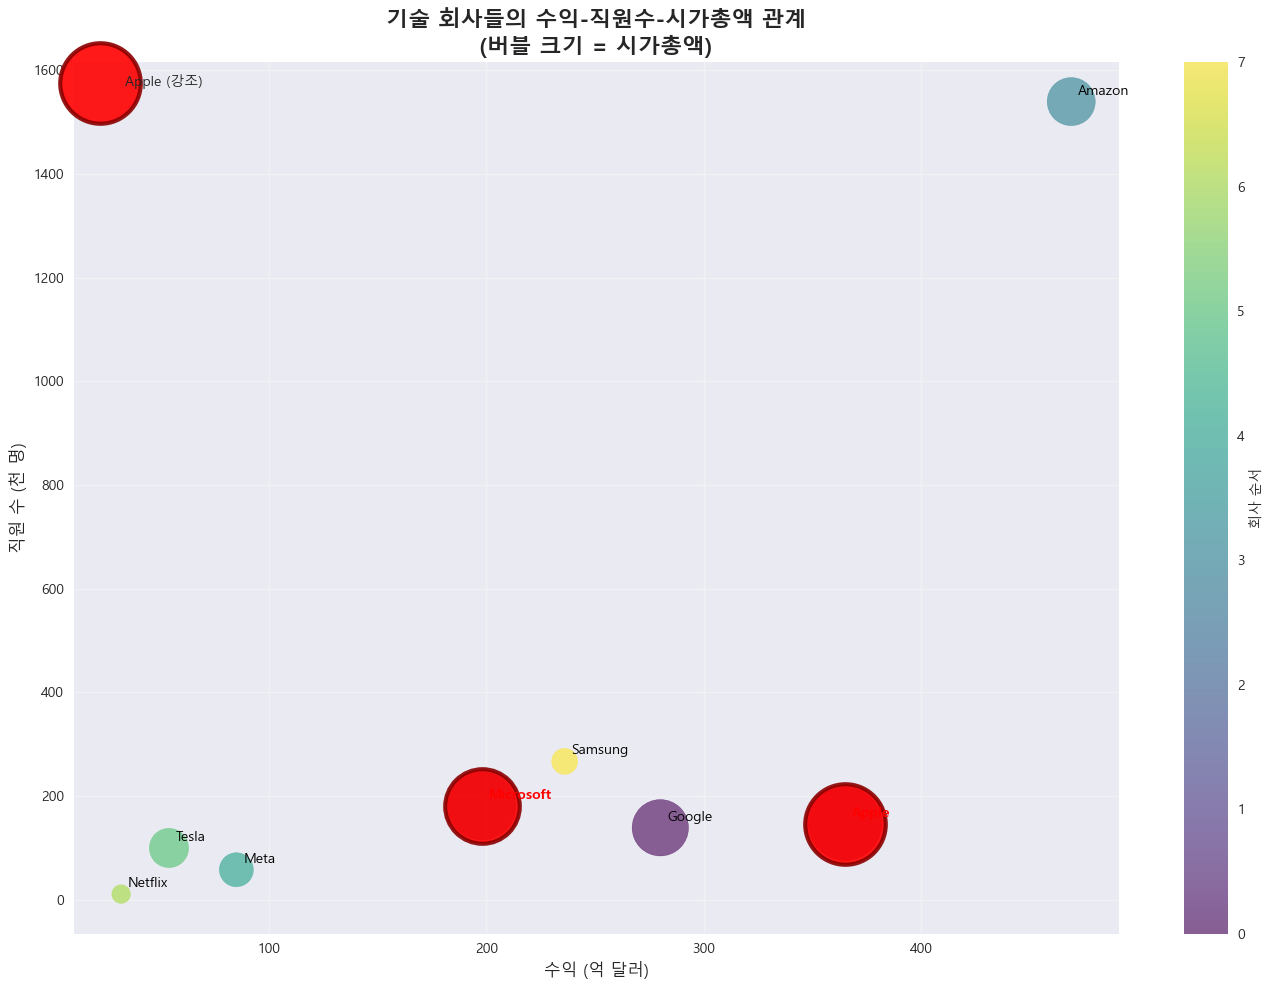

💼 버블 차트: 크기로 추가 정보 표현하고 색상으로 강조!


In [34]:
plt.rc('font', family='Malgun Gothic') # 윈도우 한글 폰트


# 4.2 버블 차트 - 크기로 3차원 정보 표현
companies = ['Google', 'Apple', 'Microsoft', 'Amazon', 'Meta', 'Tesla', 'Netflix', 'Samsung']
revenue = [280, 365, 198, 469, 85, 54, 32, 236]  # 수익 (억달러)
employees = [139, 147, 181, 1540, 58, 100, 11, 267]  # 직원수 (천명)
market_cap = [1650, 2800, 2400, 1200, 600, 800, 180, 350]  # 시가총액 (억달러)

plt.figure(figsize=(14, 10))

# 기본 버블 차트
scatter = plt.scatter(revenue, employees, s=market_cap, alpha=0.6, 
                     c=range(len(companies)), cmap='viridis')

# 특정 회사들 강조 (Apple, Microsoft)
highlight_companies = ['Apple', 'Microsoft']
for i, company in enumerate(companies):
    if company in highlight_companies:
        plt.scatter(revenue[i], employees[i], s=market_cap[i]*1.2, 
                   alpha=0.9, c='red', edgecolors='darkred', linewidths=3,
                   label=f'{company} (강조)' if company == highlight_companies[0] else "")

# 회사 이름 레이블
for i, company in enumerate(companies):
    fontweight = 'bold' if company in highlight_companies else 'normal'
    color = 'red' if company in highlight_companies else 'black'
    plt.annotate(company, (revenue[i], employees[i]), xytext=(5, 5), 
                textcoords='offset points', fontsize=10, fontweight=fontweight, color=color)

plt.xlabel('수익 (억 달러)', fontsize=12)
plt.ylabel('직원 수 (천 명)', fontsize=12)
plt.title('기술 회사들의 수익-직원수-시가총액 관계\n(버블 크기 = 시가총액)', fontsize=16, fontweight='bold')

# 컬러바 추가
cbar = plt.colorbar(scatter)
cbar.set_label('회사 순서', fontsize=10)

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print("💼 버블 차트: 크기로 추가 정보 표현하고 색상으로 강조!")

## 5. 히스토그램에서의 강조 기법 📊

### 5.1 특정 구간 색상 강조 및 임계값 표시

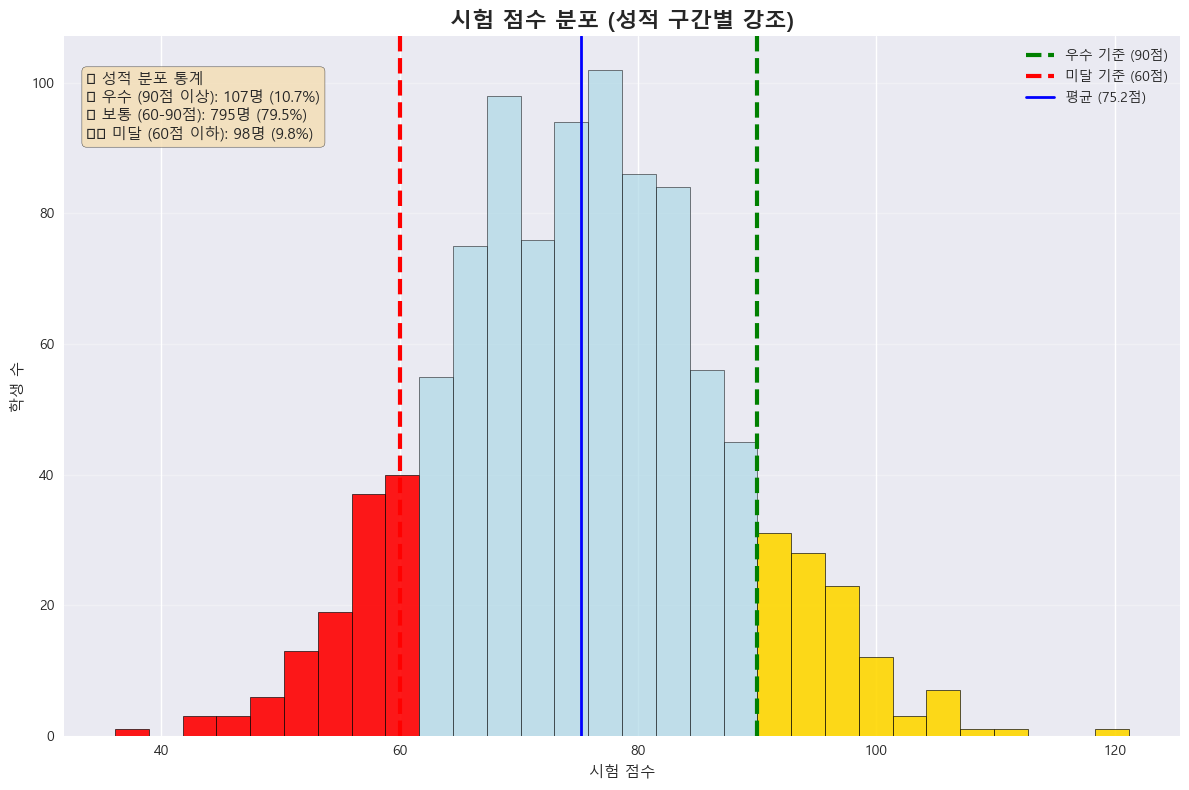

📊 히스토그램 강조: 특정 구간을 색상으로 구분하여 의미 전달!


In [35]:
plt.rc('font', family='Malgun Gothic') # 윈도우 한글 폰트


# 5.1 히스토그램 - 특정 구간 강조
np.random.seed(42)
test_scores = np.random.normal(75, 12, 1000)

plt.figure(figsize=(12, 8))

# 히스토그램 생성
n, bins, patches = plt.hist(test_scores, bins=30, alpha=0.7, color='lightblue', 
                           edgecolor='black', linewidth=0.5)

# 특정 구간 강조 (90점 이상 = 우수, 60점 이하 = 미달)
for i, patch in enumerate(patches):
    if bins[i] >= 90:  # 우수 구간
        patch.set_facecolor('gold')
        patch.set_alpha(0.9)
    elif bins[i] <= 60:  # 미달 구간
        patch.set_facecolor('red')
        patch.set_alpha(0.9)

# 기준선 추가
plt.axvline(x=90, color='green', linestyle='--', linewidth=3, label='우수 기준 (90점)')
plt.axvline(x=60, color='red', linestyle='--', linewidth=3, label='미달 기준 (60점)')
plt.axvline(x=np.mean(test_scores), color='blue', linestyle='-', linewidth=2, 
           label=f'평균 ({np.mean(test_scores):.1f}점)')

# 구간별 통계 정보 추가
excellent_count = np.sum(test_scores >= 90)
poor_count = np.sum(test_scores <= 60)
normal_count = len(test_scores) - excellent_count - poor_count

plt.text(0.02, 0.95, f'📊 성적 분포 통계\n'
                     f'🏆 우수 (90점 이상): {excellent_count}명 ({excellent_count/len(test_scores)*100:.1f}%)\n'
                     f'📚 보통 (60-90점): {normal_count}명 ({normal_count/len(test_scores)*100:.1f}%)\n'
                     f'⚠️ 미달 (60점 이하): {poor_count}명 ({poor_count/len(test_scores)*100:.1f}%)',
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.xlabel('시험 점수')
plt.ylabel('학생 수')
plt.title('시험 점수 분포 (성적 구간별 강조)', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 히스토그램 강조: 특정 구간을 색상으로 구분하여 의미 전달!")

## 6. 박스플롯에서의 강조 기법 📦

### 6.1 아웃라이어와 특정 박스 강조

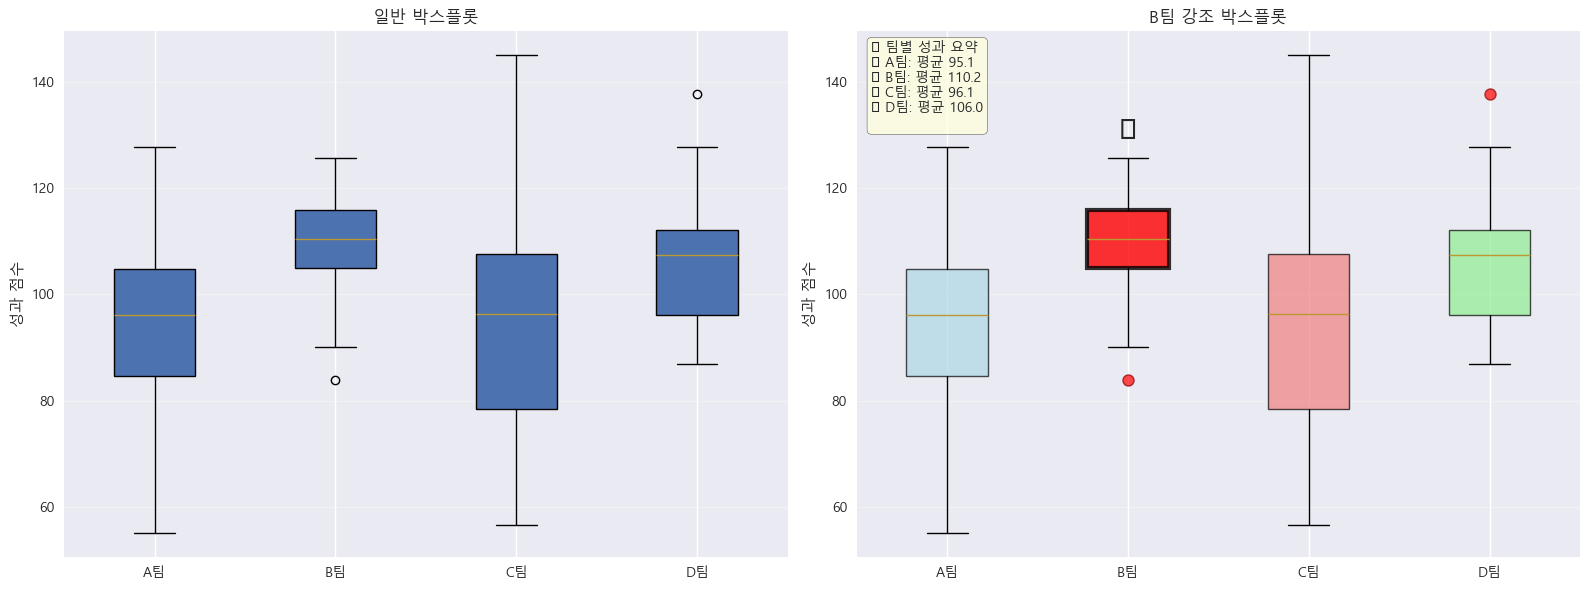

📦 박스플롯 강조: 우수 그룹과 이상값을 색상과 마커로 부각!


In [36]:
plt.rc('font', family='Malgun Gothic') # 윈도우 한글 폰트


# 6.1 박스플롯 - 아웃라이어 및 특정 그룹 강조
np.random.seed(42)

# 4개 그룹의 데이터 생성
group_data = {
    'A팀': np.random.normal(100, 15, 50),
    'B팀': np.random.normal(110, 10, 50),  # B팀이 가장 우수
    'C팀': np.random.normal(95, 20, 50),
    'D팀': np.random.normal(105, 12, 50)
}

# 일부 극값(아웃라이어) 추가
group_data['C팀'] = np.append(group_data['C팀'], [140, 145])  # 높은 아웃라이어
group_data['A팀'] = np.append(group_data['A팀'], [60, 55])    # 낮은 아웃라이어

data_list = list(group_data.values())
labels = list(group_data.keys())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 일반 박스플롯
box1 = ax1.boxplot(data_list, labels=labels, patch_artist=True)
ax1.set_title('일반 박스플롯')
ax1.set_ylabel('성과 점수')
ax1.grid(axis='y', alpha=0.3)

# 강조된 박스플롯
box2 = ax2.boxplot(data_list, labels=labels, patch_artist=True, 
                   flierprops=dict(marker='o', markerfacecolor='red', markersize=8, 
                                  markeredgecolor='darkred', alpha=0.7))

# 각 박스 색상 설정 (B팀 강조)
colors = ['lightblue', 'gold', 'lightcoral', 'lightgreen']
highlight_color = 'red'

for patch, color, label in zip(box2['boxes'], colors, labels):
    if label == 'B팀':  # B팀 강조
        patch.set_facecolor(highlight_color)
        patch.set_alpha(0.8)
        patch.set_linewidth(3)
    else:
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

# B팀 박스에 왕관 표시
b_team_idx = labels.index('B팀')
ax2.text(b_team_idx + 1, max(group_data['B팀']) + 5, '👑', 
         ha='center', va='center', fontsize=20)

ax2.set_title('B팀 강조 박스플롯')
ax2.set_ylabel('성과 점수')
ax2.grid(axis='y', alpha=0.3)

# 통계 정보 추가
stats_text = "📈 팀별 성과 요약\n"
for team, data in group_data.items():
    mean_val = np.mean(data)
    emoji = "🏆" if team == 'B팀' else "📊"
    stats_text += f"{emoji} {team}: 평균 {mean_val:.1f}\n"

ax2.text(0.02, 0.98, stats_text, transform=ax2.transAxes, 
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()

print("📦 박스플롯 강조: 우수 그룹과 이상값을 색상과 마커로 부각!")

## 7. 종합 실습: 다중 서브플롯에서 통합 강조 기법 🎨

마지막으로 여러 플롯을 조합하여 종합적인 강조 효과를 만들어보겠습니다.

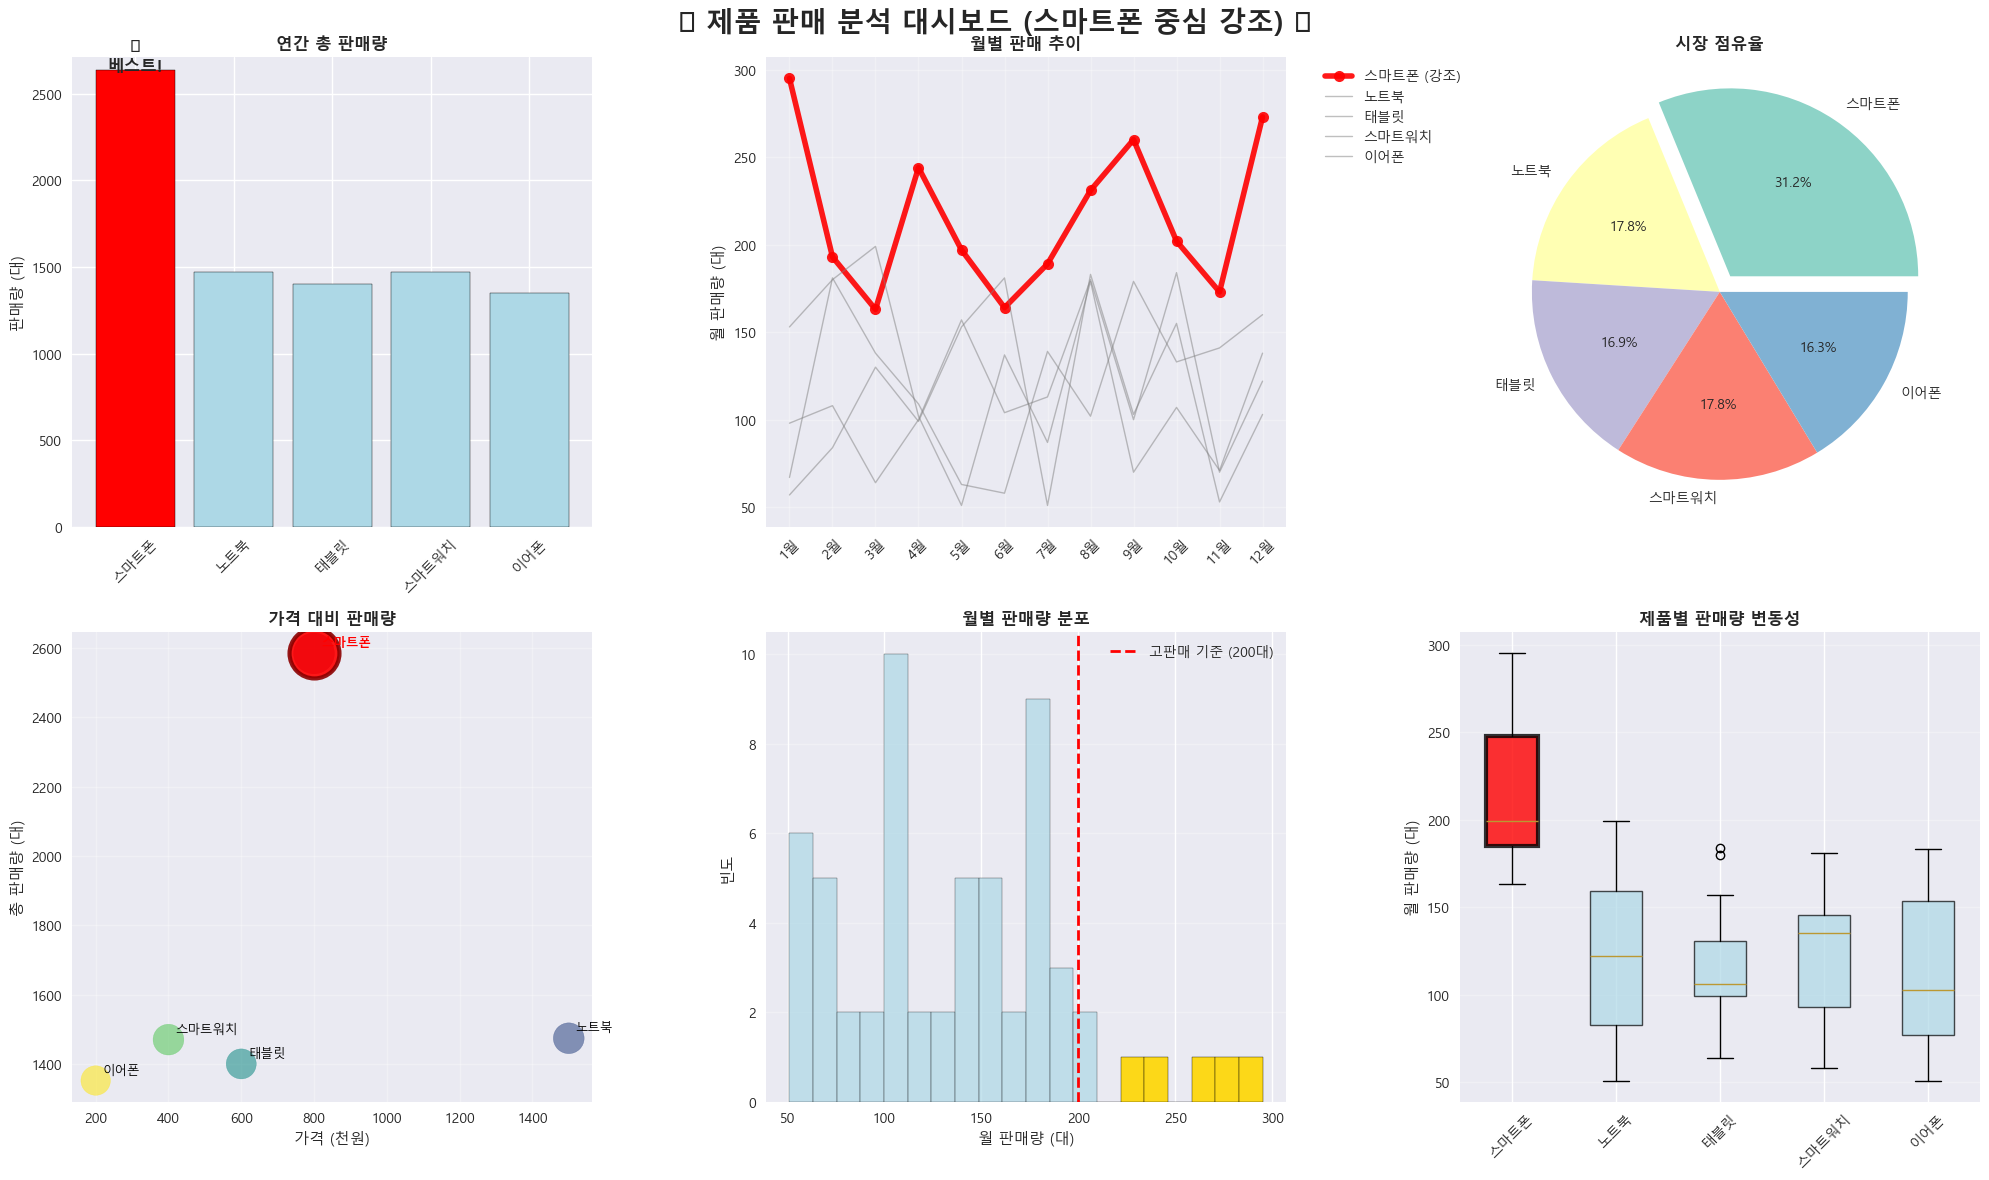

🎨 종합 강조 기법: 여러 플롯에서 일관된 강조로 스토리텔링!


In [37]:
plt.rc('font', family='Malgun Gothic') # 윈도우 한글 폰트


# 7. 종합 실습 - 다중 서브플롯 강조
np.random.seed(42)

# 가상의 제품 판매 데이터
products = ['스마트폰', '노트북', '태블릿', '스마트워치', '이어폰']
monthly_sales = {
    product: np.random.randint(50, 200, 12) for product in products
}
monthly_sales['스마트폰'] = np.random.randint(150, 300, 12)  # 스마트폰이 베스트셀러

months = ['1월', '2월', '3월', '4월', '5월', '6월', 
          '7월', '8월', '9월', '10월', '11월', '12월']

fig = plt.figure(figsize=(20, 12))

# 1. 바차트 - 연간 총판매량
ax1 = plt.subplot(2, 3, 1)
total_sales = [sum(monthly_sales[product]) for product in products]
colors = ['red' if product == '스마트폰' else 'lightblue' for product in products]
bars = ax1.bar(products, total_sales, color=colors, edgecolor='black')

# 베스트셀러 강조
best_idx = total_sales.index(max(total_sales))
bars[best_idx].set_height(bars[best_idx].get_height() * 1.02)
ax1.text(best_idx, max(total_sales) + 50, '🏆\n베스트!', ha='center', 
         fontsize=12, fontweight='bold')

ax1.set_title('연간 총 판매량', fontweight='bold')
ax1.set_ylabel('판매량 (대)')
plt.setp(ax1.get_xticklabels(), rotation=45)

# 2. 라인플롯 - 월별 추이 (스마트폰 강조)
ax2 = plt.subplot(2, 3, 2)
for product in products:
    if product == '스마트폰':
        ax2.plot(months, monthly_sales[product], color='red', linewidth=4, 
                marker='o', markersize=8, label=f'{product} (강조)', alpha=0.9)
    else:
        ax2.plot(months, monthly_sales[product], color='gray', linewidth=1, 
                alpha=0.5, label=product)

ax2.set_title('월별 판매 추이', fontweight='bold')
ax2.set_ylabel('월 판매량 (대)')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.setp(ax2.get_xticklabels(), rotation=45)
ax2.grid(True, alpha=0.3)

# 3. 파이차트 - 시장 점유율 (스마트폰 explode)
ax3 = plt.subplot(2, 3, 3)
explode = [0.1 if product == '스마트폰' else 0 for product in products]
wedges, texts, autotexts = ax3.pie(total_sales, labels=products, autopct='%1.1f%%',
                                   explode=explode, colors=plt.cm.Set3.colors)
ax3.set_title('시장 점유율', fontweight='bold')

# 4. 산점도 - 가격 대비 판매량
ax4 = plt.subplot(2, 3, 4)
prices = [800, 1500, 600, 400, 200]  # 가격 (천원)
sizes = [sale/3 for sale in total_sales]  # 버블 크기

scatter = ax4.scatter(prices, total_sales, s=sizes, alpha=0.6, 
                     c=range(len(products)), cmap='viridis')

# 스마트폰 특별 강조
smartphone_idx = products.index('스마트폰')
ax4.scatter(prices[smartphone_idx], total_sales[smartphone_idx], 
           s=sizes[smartphone_idx]*1.5, c='red', alpha=0.9, 
           edgecolors='darkred', linewidths=3)

for i, product in enumerate(products):
    color = 'red' if product == '스마트폰' else 'black'
    weight = 'bold' if product == '스마트폰' else 'normal'
    ax4.annotate(product, (prices[i], total_sales[i]), xytext=(5, 5),
                textcoords='offset points', fontsize=9, 
                color=color, fontweight=weight)

ax4.set_xlabel('가격 (천원)')
ax4.set_ylabel('총 판매량 (대)')
ax4.set_title('가격 대비 판매량', fontweight='bold')
ax4.grid(True, alpha=0.3)

# 5. 히스토그램 - 월별 판매량 분포
ax5 = plt.subplot(2, 3, 5)
all_monthly_data = []
for sales_list in monthly_sales.values():
    all_monthly_data.extend(sales_list)

n, bins, patches = ax5.hist(all_monthly_data, bins=20, alpha=0.7, 
                           color='lightblue', edgecolor='black')

# 고판매량 구간 강조 (200 이상)
for i, patch in enumerate(patches):
    if bins[i] >= 200:
        patch.set_facecolor('gold')
        patch.set_alpha(0.9)

ax5.axvline(x=200, color='red', linestyle='--', linewidth=2, 
           label='고판매 기준 (200대)')
ax5.set_xlabel('월 판매량 (대)')
ax5.set_ylabel('빈도')
ax5.set_title('월별 판매량 분포', fontweight='bold')
ax5.legend()
ax5.grid(axis='y', alpha=0.3)

# 6. 박스플롯 - 제품별 월 판매량 변동성
ax6 = plt.subplot(2, 3, 6)
data_for_box = [monthly_sales[product] for product in products]
box = ax6.boxplot(data_for_box, labels=products, patch_artist=True)

# 스마트폰 박스 강조
for i, (patch, product) in enumerate(zip(box['boxes'], products)):
    if product == '스마트폰':
        patch.set_facecolor('red')
        patch.set_alpha(0.8)
        patch.set_linewidth(3)
    else:
        patch.set_facecolor('lightblue')
        patch.set_alpha(0.7)

ax6.set_ylabel('월 판매량 (대)')
ax6.set_title('제품별 판매량 변동성', fontweight='bold')
plt.setp(ax6.get_xticklabels(), rotation=45)
ax6.grid(axis='y', alpha=0.3)

# 전체 타이틀
fig.suptitle('🏆 제품 판매 분석 대시보드 (스마트폰 중심 강조) 🏆', 
             fontsize=20, fontweight='bold', y=0.98)

plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

print("🎨 종합 강조 기법: 여러 플롯에서 일관된 강조로 스토리텔링!")

## 8. 강조 기법 비교표 및 활용 가이드 📋

### 📊 플롯별 강조 기법 요약표

| 플롯 타입 | 주요 강조 방법 | 적용 예시 | 효과 |
|-----------|---------------|-----------|------|
| **파이차트** | explode, 색상, 그림자 | `explode=(0.1, 0, 0)` | 특정 조각 분리 |
| **바차트** | 색상, 투명도, 크기, 패턴 | `color='red'`, `alpha=0.8` | 중요 데이터 부각 |
| **라인플롯** | 선 굵기, 색상, 마커, 배경 | `linewidth=4`, `axvspan()` | 트렌드/구간 강조 |
| **산점도** | 크기, 색상, 모양, 테두리 | `s=200`, `marker='*'` | 특별한 포인트 식별 |
| **히스토그램** | 구간 색상, 기준선 | 조건부 색상 변경 | 임계값/범위 강조 |
| **박스플롯** | 박스 색상, 아웃라이어 스타일 | `patch.set_facecolor()` | 그룹 간 비교 |

### 🎯 효과적인 강조를 위한 가이드라인

1. **색상 선택**: 강조할 데이터는 대비가 강한 색상 (빨강, 금색 등)
2. **일관성**: 같은 데이터를 여러 플롯에서 같은 방식으로 강조
3. **과도하지 않게**: 너무 많은 요소를 동시에 강조하면 효과 감소
4. **맥락 고려**: 데이터의 성격과 목적에 맞는 강조 방법 선택
5. **접근성**: 색맹을 고려한 색상 조합 사용

TypeError: alpha must be numeric or None, not <class 'list'>

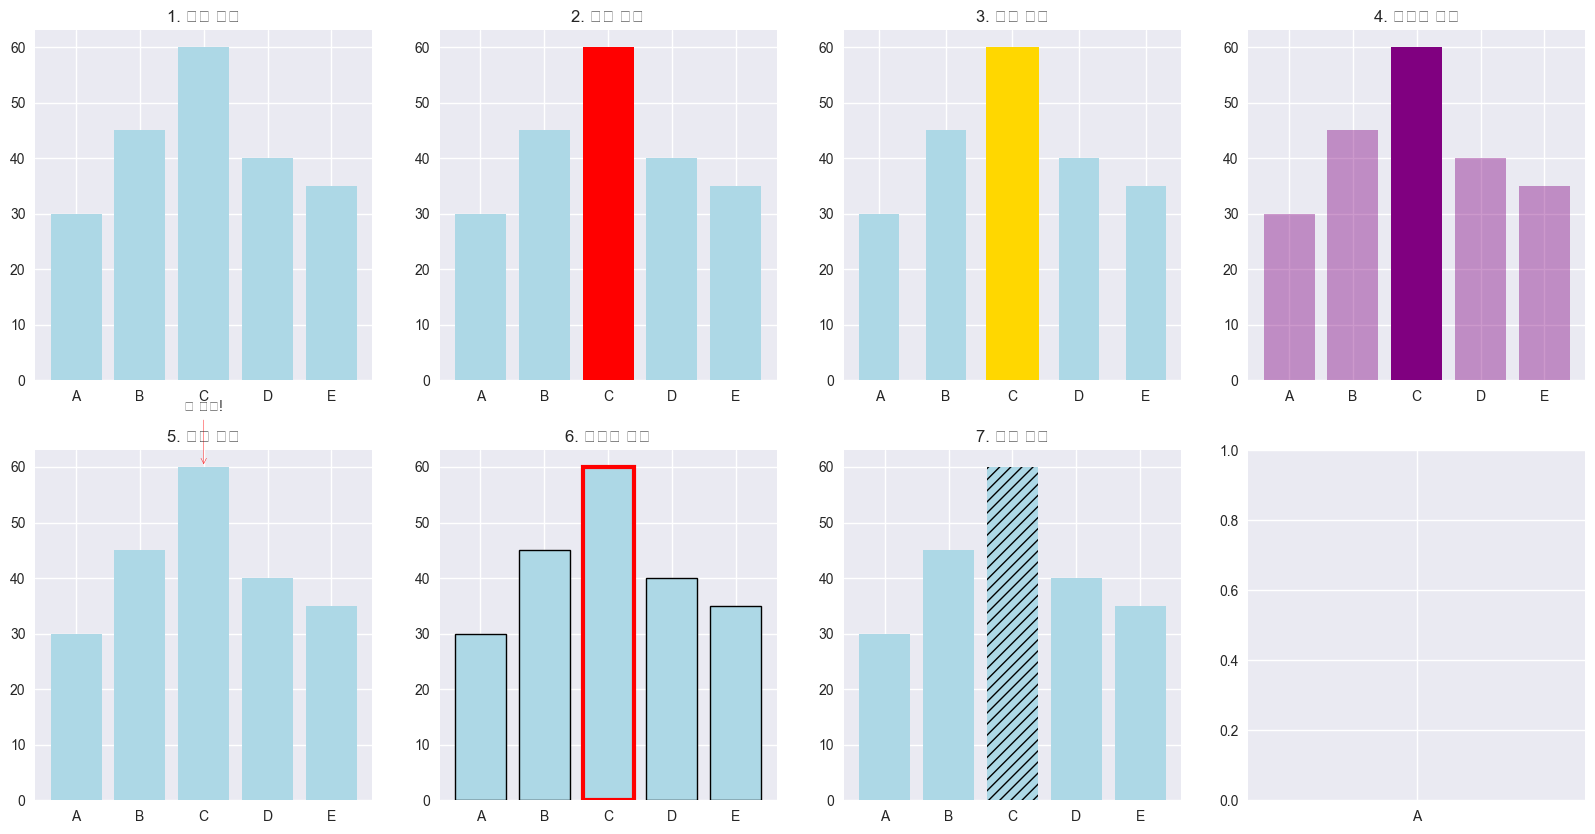

In [26]:
# 8. 강조 기법 효과 비교 실험
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

data = [30, 45, 60, 40, 35]
categories = ['A', 'B', 'C', 'D', 'E']

# 강조 없음
axes[0,0].bar(categories, data, color='lightblue')
axes[0,0].set_title('1. 강조 없음')

# 색상 강조
colors = ['red' if cat == 'C' else 'lightblue' for cat in categories]
axes[0,1].bar(categories, data, color=colors)
axes[0,1].set_title('2. 색상 강조')

# 크기 강조
widths = [0.8 if cat == 'C' else 0.6 for cat in categories]
bars = []
for i, (cat, val) in enumerate(zip(categories, data)):
    bar = axes[0,2].bar(i, val, width=widths[i], 
                       color='gold' if cat == 'C' else 'lightblue')
axes[0,2].set_title('3. 크기 강조')
axes[0,2].set_xticks(range(len(categories)))
axes[0,2].set_xticklabels(categories)

# 투명도 강조
alphas = [1.0 if cat == 'C' else 0.4 for cat in categories]
for i, (cat, val) in enumerate(zip(categories, data)):
    axes[0,3].bar(i, val, alpha=alphas[i], color='purple')
axes[0,3].set_title('4. 투명도 강조')
axes[0,3].set_xticks(range(len(categories)))
axes[0,3].set_xticklabels(categories)

# 주석 강조
axes[1,0].bar(categories, data, color='lightblue')
axes[1,0].annotate('🎯 주목!', xy=('C', data[2]), xytext=('C', data[2] + 10),
                  ha='center', arrowprops=dict(arrowstyle='->', color='red'))
axes[1,0].set_title('5. 주석 강조')

# 테두리 강조
edgecolors = ['red' if cat == 'C' else 'black' for cat in categories]
linewidths = [3 if cat == 'C' else 1 for cat in categories]
axes[1,1].bar(categories, data, color='lightblue', 
             edgecolor=edgecolors, linewidth=linewidths)
axes[1,1].set_title('6. 테두리 강조')

# 패턴 강조
bars = axes[1,2].bar(categories, data, color='lightblue')
bars[2].set_hatch('///')  # C에 패턴 추가
axes[1,2].set_title('7. 패턴 강조')

# 종합 강조
bars = axes[1,3].bar(categories, data, color=colors, alpha=alphas, 
                    edgecolor=edgecolors, linewidth=linewidths)
bars[2].set_hatch('///')
axes[1,3].annotate('🏆 최고!', xy=('C', data[2]), xytext=('C', data[2] + 10),
                  ha='center', arrowprops=dict(arrowstyle='->', color='red'),
                  fontweight='bold')
axes[1,3].set_title('8. 종합 강조')

plt.suptitle('다양한 강조 기법 효과 비교', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("🔍 강조 기법 비교: 상황에 맞는 최적의 방법 선택!")
print("📈 데이터 스토리텔링의 핵심은 적절한 강조입니다!")

## 9. 학습 정리 및 실전 팁 ✨

### 🎓 핵심 학습 내용
1. **파이차트 explode**: 조각 분리로 시선 집중
2. **바차트 강조**: 색상, 크기, 투명도, 패턴 활용
3. **라인플롯 강조**: 굵기, 배경 영역, 특정 구간 부각
4. **산점도 강조**: 크기, 모양, 색상으로 특별한 포인트 식별
5. **히스토그램 강조**: 구간별 색상 구분, 기준선 표시
6. **박스플롯 강조**: 특정 그룹과 이상값 부각

### 💡 실전 활용 팁
- **비즈니스 리포트**: 목표 달성/미달 구간을 색상으로 구분
- **학술 논문**: 통계적 유의미한 결과를 강조 표시
- **마케팅 자료**: 경쟁사 대비 우위 데이터를 시각적으로 부각
- **대시보드**: 핵심 KPI를 일관된 방식으로 강조

### 🚨 주의사항
- 과도한 강조는 오히려 집중력 분산
- 색상만으로는 부족할 때 크기, 모양 등 복합 활용
- 색맹 접근성 고려한 색상 조합 선택
- 데이터의 의미와 강조 방법의 일치성 확인

---
### 🎉 축하합니다!
다양한 플롯에서의 강조 기법을 모두 마스터하셨네요!  
이제 어떤 데이터든 효과적으로 강조하여 임팩트 있는 시각화를 만들 수 있습니다! 💪✨

In [ ]:
# 마무리 메시지
print("🎨" + "="*60 + "🎨")
print("     🎉 다양한 플롯 강조 기법 마스터 완료! 🎉")
print("="*64)
print("📚 학습한 강조 기법:")
techniques = [
    "파이차트 explode", "바차트 색상/크기 강조", "라인플롯 굵기/배경 강조",
    "산점도 크기/모양 강조", "히스토그램 구간 강조", "박스플롯 그룹 강조",
    "버블차트 3차원 표현", "종합 대시보드 구성"
]

for i, technique in enumerate(techniques, 1):
    print(f"  {i:2d}. ✅ {technique}")

print("\n🚀 이제 여러분의 데이터도 임팩트 있게 강조해보세요!")
print("💡 remember: 좋은 시각화는 데이터가 스스로 말하게 합니다!")
print("🎯 Happy Data Visualization! 🎯")
print("🎨" + "="*60 + "🎨")

🎨============================================================🎨
     🎉 다양한 플롯 강조 기법 마스터 완료! 🎉
📚 학습한 강조 기법:
   1. ✅ 파이차트 explode
   2. ✅ 바차트 색상/크기 강조
   3. ✅ 라인플롯 굵기/배경 강조
   4. ✅ 산점도 크기/모양 강조
   5. ✅ 히스토그램 구간 강조
   6. ✅ 박스플롯 그룹 강조
   7. ✅ 버블차트 3차원 표현
   8. ✅ 종합 대시보드 구성

🚀 이제 여러분의 데이터도 임팩트 있게 강조해보세요!
💡 remember: 좋은 시각화는 데이터가 스스로 말하게 합니다!
🎯 Happy Data Visualization! 🎯
🎨============================================================🎨
